In [1]:
# Importing the essential libraries to read in the dataset and perform basic numeric operations

import pandas as pd
import numpy as np

In [2]:
# Importing also the visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

# Since, we are using jupyter notebook, we must import this line of code to allow for our plot 
# views within the jupyter notebook
%matplotlib inline

In [3]:
# The link to the Dataset was provided and we must read in the data from the url link given
# This allows us to read the dataset from the url 

url= pd.read_csv('https://bit.ly/HDSC-StageOneDataset')

In [4]:
# To be sure our Dataset has been imported, we can alwasy check the few members present in the element
# The head part shows the first members of the element in the DataFrame.

url.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
#For convinience sake, we might have to save the data directly to your local...
# pc so we can have access to working with the dataset offline

url.to_csv('NewData', index=False)

In [6]:
# Reading the new dataset into the DataFrame
fueldata= pd.read_csv('NewData')

In [7]:
fueldata.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# Basic Exploratory Analysis

In [8]:
# To check for the basic information about the Dataset
fueldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [9]:
# It is important we also check to see the part of the dataset that allows for basic 
# arithmetics and how they can be computed such as mean, std, min and max... etc

fueldata.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [10]:
# To be sure we are not missing anything out, we must check to be sure of the shape of the Dataset

fueldata.shape

(29523, 11)

# Handling the missing Data

In [11]:
# To check for the possibility of any missing values from the DataSet
# From this dataset, we can see that we have about 180 missing elements in the dataset
# The entire missing data is coming from just one column which is 'fuel_unit'

fueldata.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [12]:
# To check for all the columns head represented in the Dataset we can call the columns attribute

fueldata.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [13]:
# Handling the missing variables, we either choose to fill the data with any of the measure of central 
# tendency and for this project we will be using the most occured element where elements are missing so, 
# 'mcf' is the most occured entity of the element from the value count called from the next line of code

fueldata['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [14]:
# Now, since the fuel_unit is the column to be filled up with the mode of the elements present in the column,
# We use the fillna method to carry out the operation and then the inplace function update and effect... 
# the change in the entire DataFrame

fueldata['fuel_unit'].fillna('mcf', inplace=True)

In [15]:
# So, the missing values have been properly handled and it has to be checked again to confirm the operation

fueldata.isna().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

# Breaking the DataSet into parts accordingly...

In [16]:
# We are required to break the Dataset into 2 with one part having 19000 elements and the other the remaining
# The first part is named fuel_df1 and the second fuel_df2

fuel_df1= fueldata.iloc[0: 19000].reset_index(drop=True)
fuel_df2= fueldata.iloc[19000:].reset_index(drop=True)

In [17]:
# It is also expedient we check and balance to be sure the divided dataset sum to be the totat dataset.

assert len(fueldata)== len(fuel_df1) + len(fuel_df2)

In [18]:
# using the merge function to bring back the two different dataframe that has been created, 
# Actually the idea for the break in the dataset is to allow work on the missing values but then so... 
# many approached can be used to handle that...

pd.merge(fuel_df1, fuel_df2, how='outer')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [19]:
# To check should incase their is any duplicated data in the dataset, we have to call the duplicate function

fueldata.duplicated().any()

False

# Basic Visualizations

Text(0.5, 1.0, 'Fuel Unit')

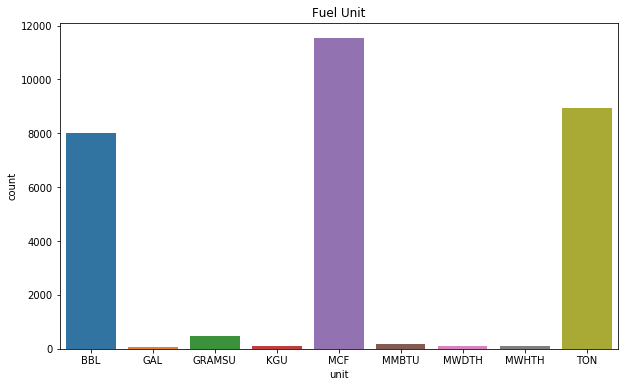

In [20]:
# Having imported the necessary libraries for the visualizations,
# We then create the required visualization

# We want to make a dictionary out of the column 'fuel_unit' and as such we want to use that as a Dataframe to 
# create our basic visualizations with the key as 'unit' and value as 'count'

plt.figure(figsize=(10,6))
fuel_unit= {'unit': ['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU','MWDTH', 'MWHTH', 'TON'],
           'count': [7998,84,464,110,11534,180,95,100,8958]}
sns.barplot(data= fuel_unit, x= 'unit', y='count')
plt.xlabel('unit')
plt.ylabel('count')
plt.title('Fuel Unit')

Text(0, 0.5, 'count')

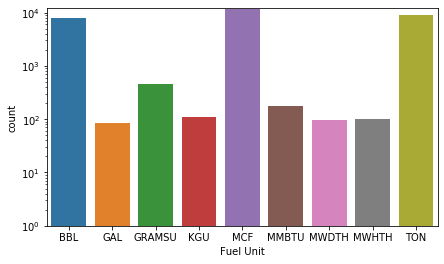

In [21]:
# For easy views because of the vlues in the plot and it not really showing the data plotted
# because of some outliers in the data, we resolve to set a lim for the y axis and then label the x and y axis 

plt.figure(figsize=(7,4))
g=sns.barplot(data= fuel_unit, x='unit', y='count' )
g.set_yscale('log')
g.set_ylim(1,12000)
plt.xlabel('Fuel Unit')
plt.ylabel('count')

In [22]:
# Now, we want to select some random sample (50) from the entire dataframe and call that the 'sample_df'

sample_df= fueldata.sample(n=50, random_state=4)

In [23]:
# Checking back at the columns of the newly created Dataframe.
sample_df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

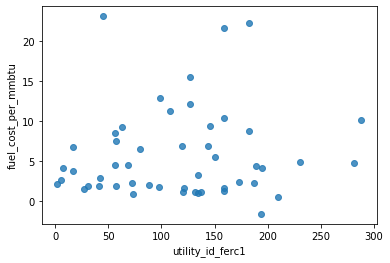

In [24]:
# Using some columns in the dataset to create a scatter plot to see how the data has been represented
# NB: Regplot has the ability to plot some varying numbers of plot within its kind...

sns.regplot(x= sample_df['utility_id_ferc1'] , y= sample_df['fuel_cost_per_mmbtu'], fit_reg=False)

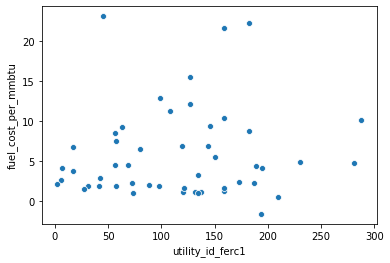

In [25]:
# Alternatively, we can have the scatter plot viewed here using sns plot directly. 
sns.scatterplot(x='utility_id_ferc1',y='fuel_cost_per_mmbtu', data= sample_df)

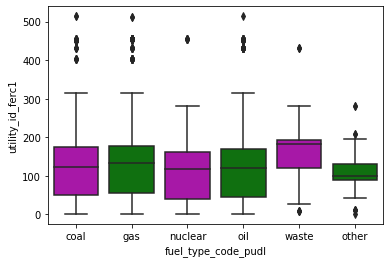

In [26]:
# Another visualization we have here is the boxplot...
# This is performed on arithmetic columns and it can be used to fill using the median values too or other 
# required arithmetic operations.

sns.boxplot(y='utility_id_ferc1',x='fuel_type_code_pudl', data= fueldata, palette= ['m', 'g'] )

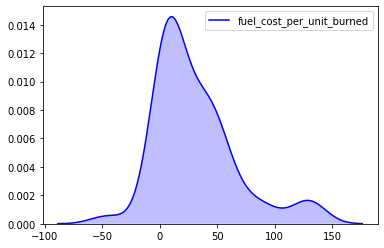

In [27]:
# Using seaborn to Density plot

sns.kdeplot(data= sample_df['fuel_cost_per_unit_burned'],color='b', shade=True)

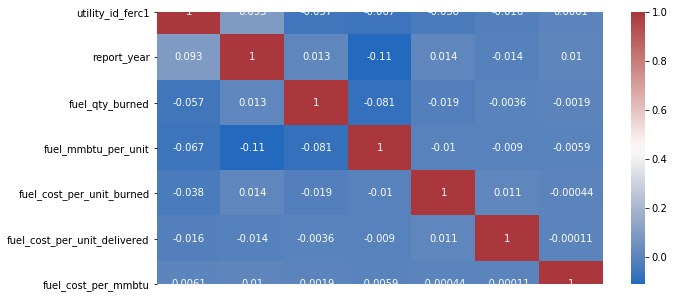

In [28]:
# The plot of figure allows to increase the size of the plot to accomodate the entire element of the Dataset
# Heatmap is a visualization that allows us the check how correlated the rows and columns of the dataset is

plt.figure(figsize=(10,5))
sns.heatmap(fueldata.corr(), annot=True, cmap= 'vlag', xticklabels=False)

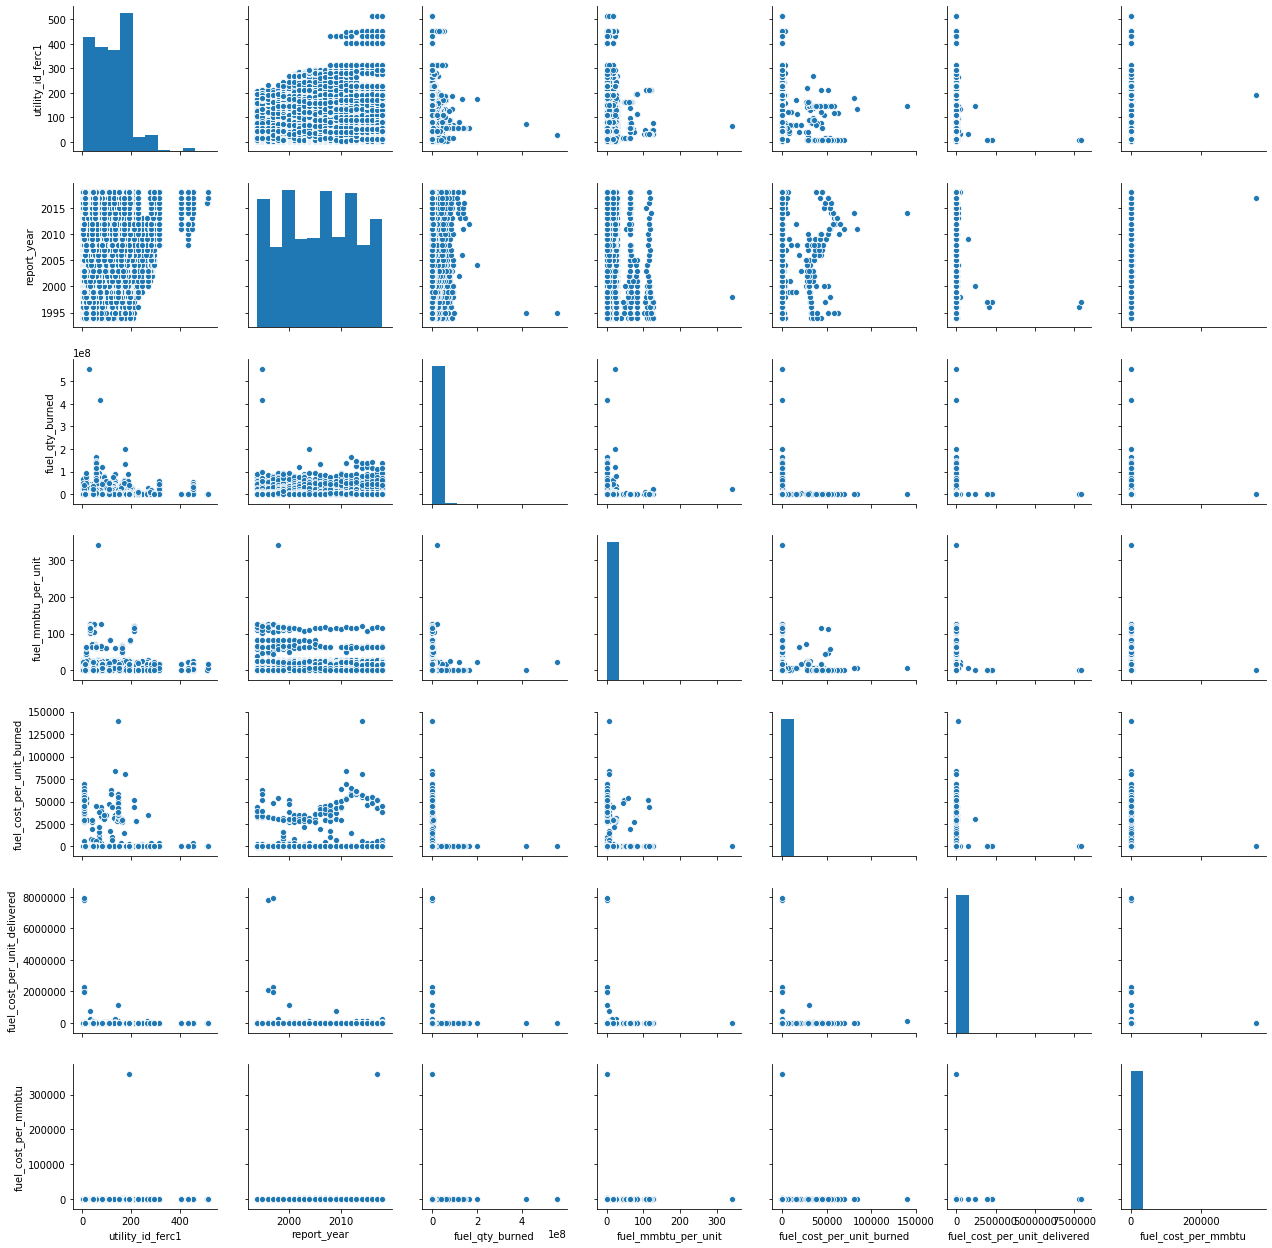

In [29]:
# Generally, we can carry out  a pairplot view to see how all the rows and columns is 
# been plotted against each other 

sns.pairplot(fueldata)

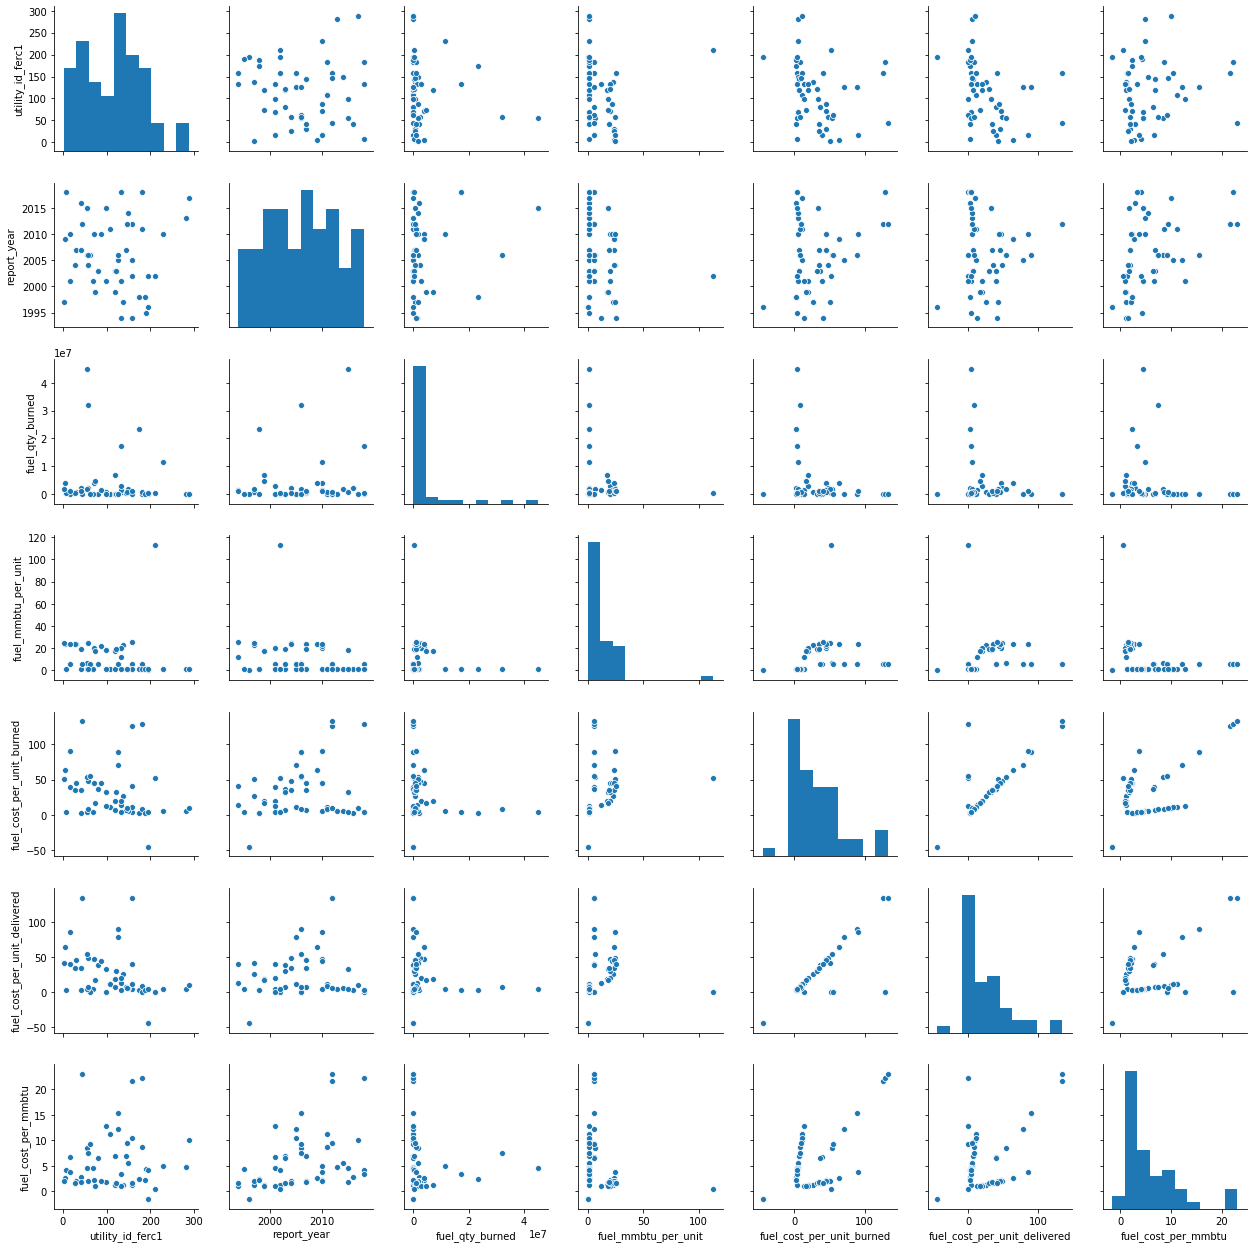

In [30]:
# So also for the sample_df, we can view the pairplot

sns.pairplot(sample_df)